In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('./Files')
import macroC as mC
%matplotlib inline

In [2]:
# Definimos si va a ser archivo de minimización de H o de free energy y si es con o sin shots.
func='FE' # 'H'/'FE'
shots=2048
method='SLSQP' # 'SLSQP'/'COBYLA'
layers=1

name='Bromoethane'

In [3]:
if shots==0:
    shots=None
types=['NoTrunc/','Trunc2/','Trunc3/','Trunc4/']
directorylist = ['./Data/'+func+'/'+typetrunc for typetrunc in types]
filelist=[directory+name+'-'+method+'-'+'Layers='+str(layers)+'-'+'Shots='+str(shots)+'.dat' for directory in directorylist]

N_sites=len(mC.bromoethane()[1])

In [4]:
# Creamos las listas vacías de los datos que vamos a leer
data=[]
dataj=[]
for j in range(len(types)):
    dataj=[i.strip().split() for i in open(filelist[j]).readlines()]
    data.append(dataj)

In [5]:
nbetas=[len(data[j]) for j in range(len(types))]
betas=[[float(data[j][i][0]) for i in range(nbetas[j])] for j in range(len(types))]
sortindex=[np.argsort(betas[i]) for i in range(len(types))]
betas=[np.sort(betas[j]) for j in range(len(types))]
overlaps=[[float(data[j][sortindex[j][i]][1]) for i in range(nbetas[j])] for j in range(len(types))]
niter=[[float(data[j][sortindex[j][i]][2]) for i in range(nbetas[j])] for j in range(len(types))]
times=[[float(data[j][sortindex[j][i]][3])/60 for i in range(nbetas[j])] for j in range(len(types))]

energies=[]
for j in range(len(types)):
    energj=[]
    for k in range(nbetas[j]):
        energjk=[float(data[j][sortindex[j][k]][i+4]) for i in range(int(2**N_sites))]
        energj.append(energjk)
    energies.append(energj)

In [6]:
labellist=[r'$m=2^N$',r'$m=2^{N-1}$',r'$m=2^{N-2}$',r'$m=N$']

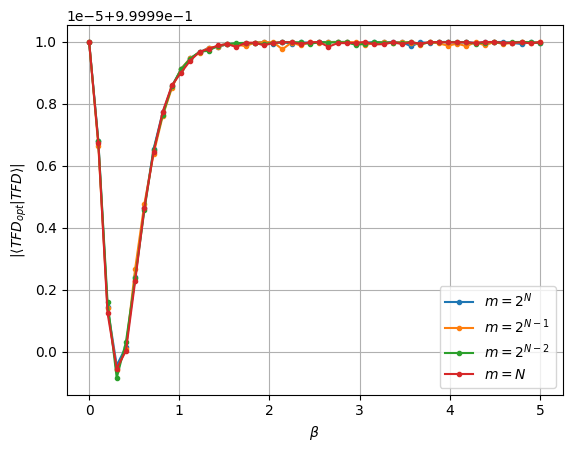

In [7]:
for i in range(len(types)):
    plt.plot(betas[i], overlaps[i], '.-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$|\langle TFD_{opt} | TFD \rangle|$')
plt.legend()
plt.grid()
plt.show()

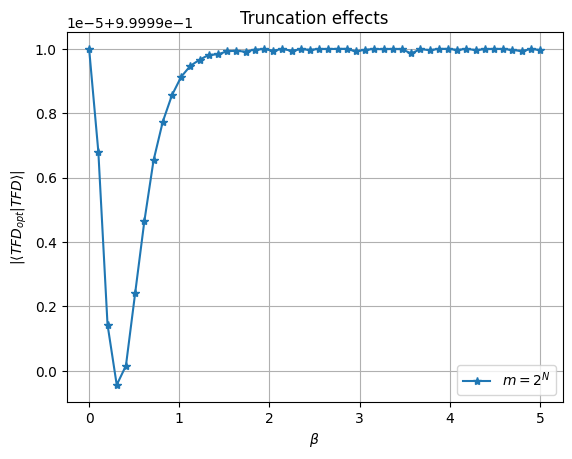

In [8]:
for i in range(1):
    plt.plot(betas[i], overlaps[i], '*-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$|\langle TFD_{opt} | TFD \rangle|$')
plt.title('Truncation effects')
plt.legend()
plt.grid()
plt.show()

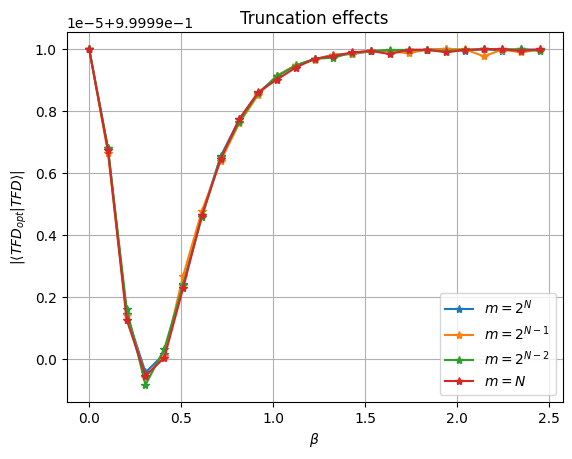

In [9]:
for i in range(len(types)):
    plt.plot(betas[i][:25], overlaps[i][:25], '*-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$|\langle TFD_{opt} | TFD \rangle|$')
plt.title('Truncation effects')
plt.legend()
plt.grid()
plt.show()

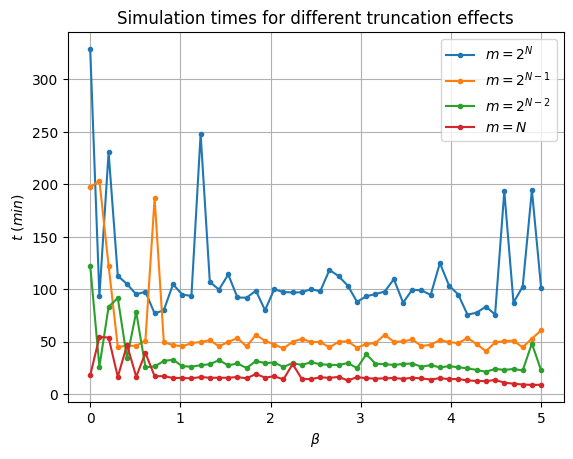

In [10]:
for i in range(len(types)):
    plt.plot(betas[i], times[i], '.-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$t \ (min)$')
plt.title('Simulation times for different truncation effects')
plt.legend()
plt.grid()
plt.show()

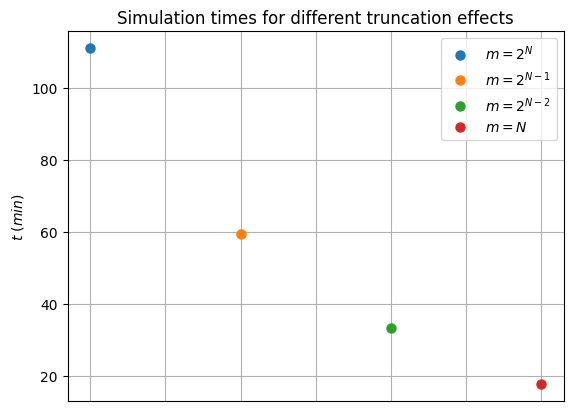

In [11]:
meantimes=[sum(times[i])*(1/len(times[i])) for i in range(len(types))]
k=0
for i in range(len(types)):
    plt.plot(i, meantimes[i], '.', label=labellist[i],markersize=13)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off    
plt.ylabel(r'$t \ (min)$')
plt.title('Simulation times for different truncation effects')
plt.legend()
plt.grid()
plt.show()

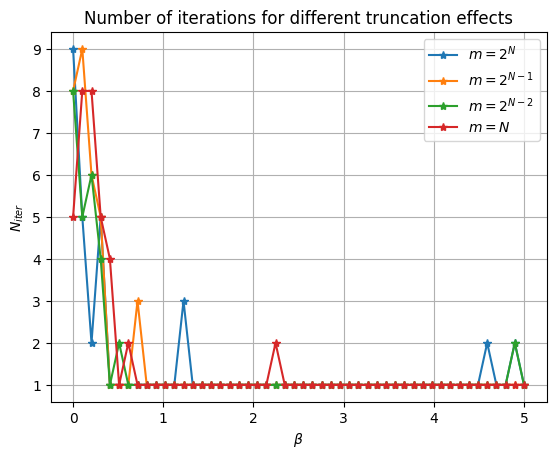

In [12]:
for i in range(len(types)):
    plt.plot(betas[i], niter[i], '*-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N_{iter}$')
plt.title('Number of iterations for different truncation effects')
plt.legend()
plt.grid()
plt.show()

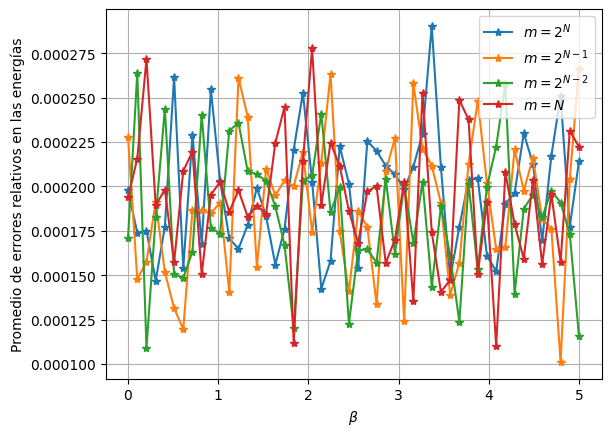

In [13]:
[H,shifts, Jlist, B, offset]=mC.bromoethane()

factor=1000
Eteo=np.sort(np.linalg.eig(H.to_matrix())[0])
E=[[np.sort(energies[k][j])*factor for j in range(nbetas[k])] for k in range(len(types))]
relerror=[[1/(len(Eteo))*sum([abs((E[k][i][j]-Eteo[j])/Eteo[j]) for j in range(len(Eteo))]) for i in range(nbetas[k])] for k in range(len(types))]
for i in range(len(types)):
    plt.plot(betas[i], relerror[i], '*-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'Promedio de errores relativos en las energías')
plt.legend()
plt.grid()
plt.show()

In [14]:
index=np.argmin(overlaps[0])

In [15]:
betas[0][index]

np.float64(0.3070612244897959)

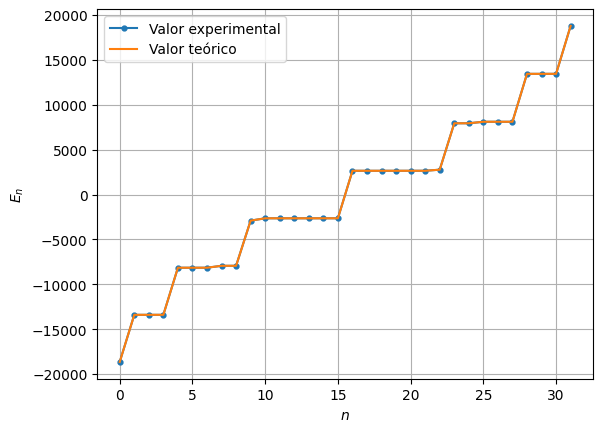

In [16]:
n=len(Eteo)
plt.plot(range(n), E[0][index], '.-', label='Valor experimental', ms=7)
plt.plot(range(n), np.real(Eteo), '-', label='Valor teórico')
plt.xlabel(r'$n$')
plt.ylabel(r'$E_n$')
plt.legend()
plt.grid()
plt.show()